In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [2]:
sns.set()
pd.set_option('display.max_columns', None)

https://sunrise-sunset.org/api

In [8]:
URL = 'https://api.sunrise-sunset.org/json'

In [16]:
params = {
    'lat': '36.7201600',
    'lng': '-4.4203400',
    'date': '2023-02-23'
}

In [17]:
response = requests.get(URL, params=params)

In [21]:
sunrise_dict = response.json()
sunrise_dict

{'results': {'sunrise': '6:55:04 AM',
  'sunset': '6:07:00 PM',
  'solar_noon': '12:31:02 PM',
  'day_length': '11:11:56',
  'civil_twilight_begin': '6:30:16 AM',
  'civil_twilight_end': '6:31:47 PM',
  'nautical_twilight_begin': '6:00:11 AM',
  'nautical_twilight_end': '7:01:53 PM',
  'astronomical_twilight_begin': '5:30:14 AM',
  'astronomical_twilight_end': '7:31:50 PM'},
 'status': 'OK'}

In [22]:
sunrise_dict['results']['day_length']

'11:11:56'

In [26]:
pd.DataFrame([sunrise_dict['results']])
# а почему нельзя без внешних квадратных скобок?

,sunrise,sunset,solar_noon,day_length,civil_twilight_begin,civil_twilight_end,nautical_twilight_begin,nautical_twilight_end,astronomical_twilight_begin,astronomical_twilight_end
0,6:55:04 AM,6:07:00 PM,12:31:02 PM,11:11:56,6:30:16 AM,6:31:47 PM,6:00:11 AM,7:01:53 PM,5:30:14 AM,7:31:50 PM


In [3]:
INDICATORS_URL = "http://api.worldbank.org/v2/indicator"

In [4]:
indicators = requests.get(INDICATORS_URL, params={'format': 'json'})

In [9]:
indicators_data = json.loads(indicators.content)

In [12]:
indicators_data[0]  # метаданные

{'page': 1, 'pages': 421, 'per_page': '50', 'total': 21009}

In [13]:
indicators = requests.get(INDICATORS_URL, params={'format': 'json', 'per_page': 21009})

In [14]:
indicators

<Response [200]>

In [15]:
indicators.connection.close()

In [16]:
indicators_data = json.loads(indicators.content)

In [17]:
indicators_data[0]  # метаданные

{'page': 1, 'pages': 1, 'per_page': '21009', 'total': 21009}

In [18]:
indicators_df = pd.DataFrame(indicators_data[1])

In [19]:
indicators_df.head()

,id,name,unit,source,sourceNote,sourceOrganization,topics
0,1.0.HCount.1.90usd,Poverty Headcount ($1.90 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
1,1.0.HCount.2.5usd,Poverty Headcount ($2.50 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
2,1.0.HCount.Mid10to50,Middle Class ($10-50 a day) Headcount,,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
3,1.0.HCount.Ofcl,Official Moderate Poverty Rate-National,,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of data from Nation...,"[{'id': '11', 'value': 'Poverty '}]"
4,1.0.HCount.Poor4uds,Poverty Headcount ($4 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"


In [20]:
URL_DATA = "http://api.worldbank.org/v2/country/all/indicator/NY.GDP.MKTP.KD.ZG"
params={'format': 'json', 'date': '2000:2020'}

In [21]:
gdp_grouth = requests.get(URL_DATA, params=params)

In [25]:
gdp_grouth

<Response [200]>

In [26]:
gdp_grouth.connection.close()

In [27]:
gdp_grouth_data = json.loads(gdp_grouth.content)

In [28]:
gdp_grouth_data[0]  # метаданные

{'page': 1,
 'pages': 112,
 'per_page': 50,
 'total': 5586,
 'sourceid': '2',
 'sourcename': 'World Development Indicators',
 'lastupdated': '2022-12-22'}

In [29]:
params={'format': 'json', 'date': '2000:2020', 'per_page': gdp_grouth_data[0]['total']}
gdp_grouth = requests.get(URL_DATA, params=params)
gdp_grouth.connection.close()

In [30]:
gdp_grouth_data = json.loads(gdp_grouth.content)

In [31]:
gdp_grouth_df = pd.DataFrame(gdp_grouth_data[1])

In [32]:
gdp_grouth_df.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'NY.GDP.MKTP.KD.ZG', 'value': 'GDP grow...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2020,-2.900490,,,1
1,"{'id': 'NY.GDP.MKTP.KD.ZG', 'value': 'GDP grow...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2019,2.078473,,,1
2,"{'id': 'NY.GDP.MKTP.KD.ZG', 'value': 'GDP grow...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2018,2.510797,,,1
3,"{'id': 'NY.GDP.MKTP.KD.ZG', 'value': 'GDP grow...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2017,2.546020,,,1
4,"{'id': 'NY.GDP.MKTP.KD.ZG', 'value': 'GDP grow...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2016,2.224016,,,1


In [33]:
# выделим из столбца country названия стран
gdp_grouth_df['country_name'] = gdp_grouth_df['country'].apply(lambda x: x['value'])

In [41]:
# сводная таблица: ВВП по странам и годам
gdp_grouth_by_country = gdp_grouth_df.pivot('country_name', 'date', 'value')

In [42]:
gdp_grouth_by_country

date,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
country_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,8.832278,1.414118,11.229715,5.357403,13.826320,3.924984,21.390528,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101
Africa Eastern and Southern,3.353978,3.653224,3.905250,3.096045,5.507315,6.116924,6.561318,6.568777,4.302482,0.645423,5.197137,3.700190,0.838836,4.221358,3.990637,2.976421,2.224016,2.546020,2.510797,2.078473,-2.900490
Africa Western and Central,3.743667,5.217663,9.938149,5.532113,8.022838,5.852892,5.379765,5.539131,6.283029,6.288381,6.965427,4.852048,5.135584,6.108758,5.930450,2.745137,0.113687,2.305623,2.946175,3.190879,-0.900382
Albania,6.946217,8.293313,4.536524,5.528637,5.514668,5.526424,5.902659,5.983260,7.500041,3.354289,3.706938,2.545406,1.417243,1.002018,1.774449,2.218726,3.314981,3.802227,4.019360,2.088063,-3.481630
Algeria,3.800000,3.000000,5.600000,7.200000,4.300000,5.900000,1.700000,3.400000,2.400000,1.600000,3.600000,2.900000,3.400000,2.800000,3.800000,3.700000,3.200000,1.300000,1.200000,1.000000,-5.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,-8.556183,-9.310638,-12.489192,14.015865,21.925239,11.290651,-0.996556,3.788282,7.429182,8.593491,5.777362,9.600808,6.096457,4.698570,-0.157867,3.721300,8.864619,1.419368,1.227077,1.362687,-11.318466
World,4.514957,2.009203,2.304828,3.109627,4.471241,4.004597,4.420425,4.381901,2.069176,-1.341448,4.540838,3.310324,2.709179,2.807854,3.090093,3.078568,2.801958,3.384964,3.285537,2.591290,-3.115404
"Yemen, Rep.",6.181916,3.803646,3.935232,3.747398,3.972696,5.591748,3.170409,3.338428,3.647569,3.866230,7.702307,-12.714897,2.392990,4.823519,-0.188690,-27.994546,-9.375124,-5.071796,0.752448,NaN,NaN


In [46]:
gdp_grouth_by_country.index.to_list()

['Afghanistan',
 'Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',
 'East

In [51]:
country_group = [
    'East Asia & Pacific',
    'South Asia',
    'Europe & Central Asia',
    'North America',
    'World',
    'Russian Federation'
]

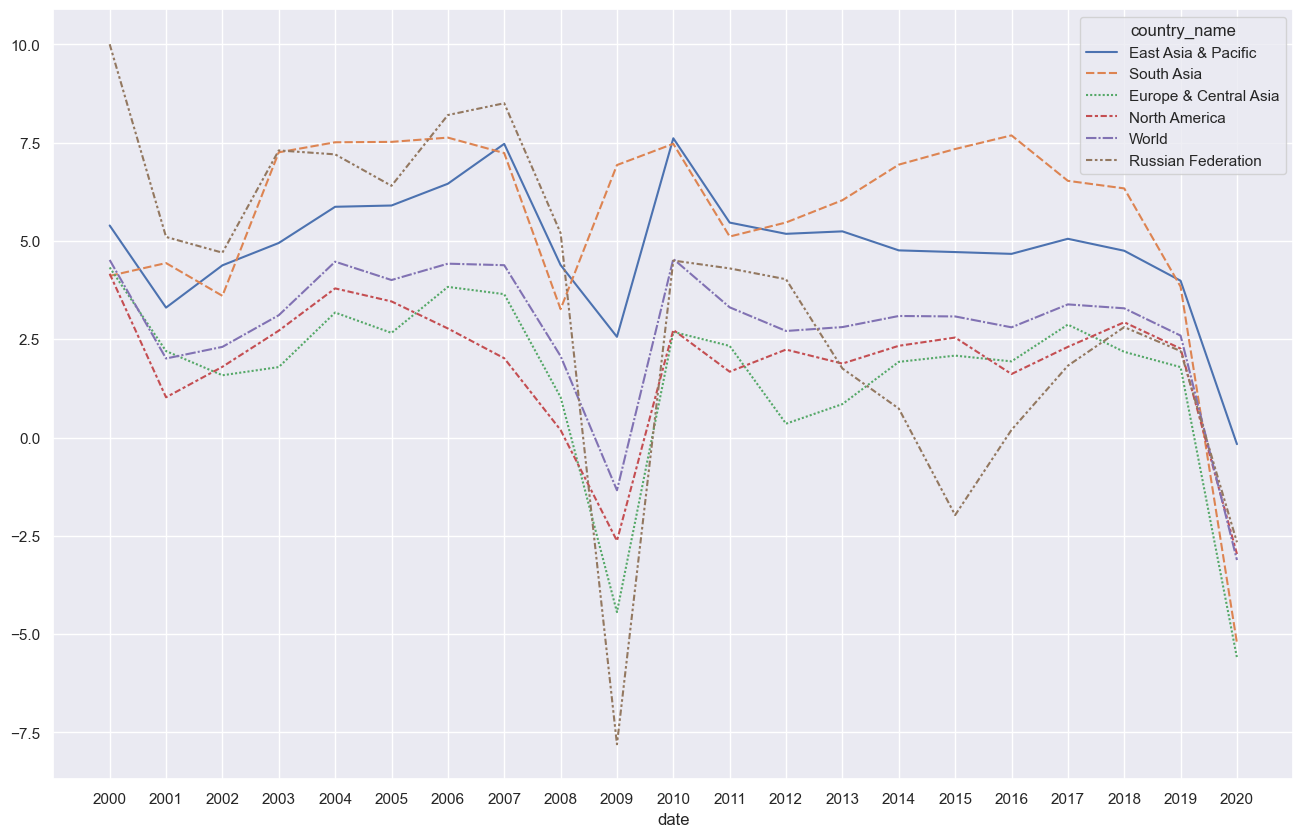

In [53]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=gdp_grouth_by_country.loc[country_group, :].T);